In [155]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import os
for dirname, _, filenames in os.walk('../Users/btobin/Downloads/ciphertext-challenge-iii'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [156]:
text = pd.read_csv('train.csv')
cipher = pd.read_csv('test.csv')
sub_sample = pd.read_csv('sample_submission.csv')

In [157]:
text.head(3)

,plaintext_id,text,index
0,ID_d45641fc3,"come, who you are and what you would are out o...",104199
1,ID_2058482ae,For all in vain comes counsel to his ear.,79081
2,ID_5257a6819,Captain: With the next benefit o' the wind.,31234


In [158]:
cipher.head(3)

,ciphertext_id,ciphertext,difficulty
0,ID_4a6fc1ea9,H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl...,1
1,ID_9460d3380,Ah1QtVkLNcx7Q6mgvleEAqFIzyZoYkVtiKnd2Yy2t2GmoT...,4
2,ID_ac39fd360,BxBYt00fPc5zQqmls1mAFrVIzihsdFdoiKjdzZ22tWOnoT...,4


In [159]:
cipher['difficulty'].value_counts()

3    27416
4    27332
1    27158
2    26849
Name: difficulty, dtype: int64

In [160]:
cipher['difficulty'].value_counts(10)

3    0.252090
4    0.251317
1    0.249717
2    0.246876
Name: difficulty, dtype: float64

In [161]:
cipher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108755 entries, 0 to 108754
Data columns (total 3 columns):
ciphertext_id    108755 non-null object
ciphertext       108755 non-null object
difficulty       108755 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


In [162]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108755 entries, 0 to 108754
Data columns (total 3 columns):
plaintext_id    108755 non-null object
text            108755 non-null object
index           108755 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


In [163]:
print("Total length of text :",len(text['text'].value_counts()))

Total length of text : 108755


In [164]:
print("Total length of cipher :",len(cipher['ciphertext'].value_counts()))

Total length of cipher : 108755


In [165]:
%%time
for index, row in text.iterrows():
    text.at[index,'len'] = len(row['text'])
    
for index, row in cipher.iterrows():
    cipher.at[index,'len'] = len(row['ciphertext'])

Wall time: 28.7 s


In [166]:
cipher['index'] = text['index']

In [167]:
cipher.head(3)

,ciphertext_id,ciphertext,difficulty,len,index
0,ID_4a6fc1ea9,H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl...,1,100.0,104199
1,ID_9460d3380,Ah1QtVkLNcx7Q6mgvleEAqFIzyZoYkVtiKnd2Yy2t2GmoT...,4,764.0,79081
2,ID_ac39fd360,BxBYt00fPc5zQqmls1mAFrVIzihsdFdoiKjdzZ22tWOnoT...,4,772.0,31234


In [168]:
text.head(3)

,plaintext_id,text,index,len
0,ID_d45641fc3,"come, who you are and what you would are out o...",104199,50.0
1,ID_2058482ae,For all in vain comes counsel to his ear.,79081,41.0
2,ID_5257a6819,Captain: With the next benefit o' the wind.,31234,43.0


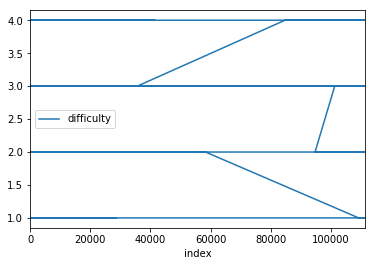

In [169]:
test_df.plot(x='index', y='difficulty')

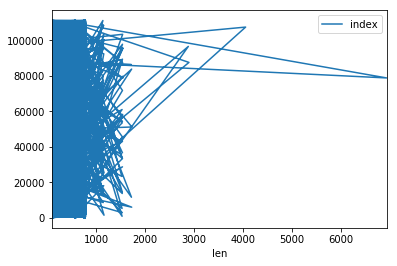

In [170]:
cipher.plot(x='len', y='index')

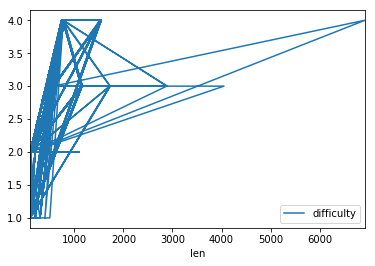

In [171]:
cipher.plot(x='len', y='difficulty')

In [174]:
text.head(3)

,plaintext_id,text,index,len
0,ID_d45641fc3,"come, who you are and what you would are out o...",104199,50.0
1,ID_2058482ae,For all in vain comes counsel to his ear.,79081,41.0
2,ID_5257a6819,Captain: With the next benefit o' the wind.,31234,43.0


In [175]:
cipher.head(3)

,ciphertext_id,ciphertext,difficulty,len,index
0,ID_4a6fc1ea9,H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl...,1,100.0,104199
1,ID_9460d3380,Ah1QtVkLNcx7Q6mgvleEAqFIzyZoYkVtiKnd2Yy2t2GmoT...,4,764.0,79081
2,ID_ac39fd360,BxBYt00fPc5zQqmls1mAFrVIzihsdFdoiKjdzZ22tWOnoT...,4,772.0,31234


In [176]:
sub_sample.head(3)

,ciphertext_id,index
0,ID_2a3ea0caa,0
1,ID_ddbd3b32d,0
2,ID_fa75bb12c,0


In [177]:
sub_sample.update(cipher)

In [178]:
sub_sample.head(3)

,ciphertext_id,index
0,ID_4a6fc1ea9,104199
1,ID_9460d3380,79081
2,ID_ac39fd360,31234


In [179]:
sub_sample.to_csv('submission.csv', index=False)

In [181]:
print("Total length of text :",(submission['index'].value_counts()))

Total length of text : 0    108755
Name: index, dtype: int64
